<a href="https://colab.research.google.com/github/wilburshi/LogisticRegression_tutorial/blob/main/LogisticRegression_RiskAttitude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression for Risk Attitude Task

Logistic regression can also quantify the risk attitude

Risk Attitude Task (Padoa-Schioppa, 2022)


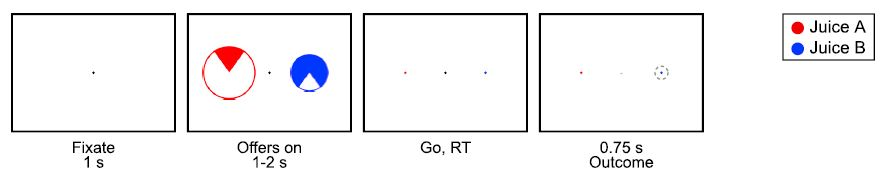

In [ ]:
from IPython.display import Image, display
print('Risk Attitude Task (Padoa-Schioppa, 2022)')
!git clone https://github.com/wilburshi/LogisticRegression_tutorial.git # use it only for google colab 
display(Image('LogisticRegression_tutorial/pics/JC_tasks.jpg', width=400, unconfined=True)) # use it only for google colab 
# display(Image('../pics/RiskAttitude_tasks.jpg', width=700, unconfined=True))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.io import loadmat


## Logistic regression with risk attitude

### Step 1: load data

First, let's load example data file named as `goodTrials_pq.mat`. It only contains trials that monkey has successfully chosen one of the juice option.  

`goodTrials.mat` is a $N \times 6$, where $N$ is the number of the trials in this session, and in this example, $N =92$. The columns of this matrix indicated:

 - *column 1*: the trial number.

 - *column 2*: the quantity of juice A.
 
 - *column 3*: the quantity of juice B.
 
 - *column 4*: the probability of juice A.

 - *column 5*: the probability of juice B.
 
 - *column 6*: the chosen juice type, with 1 indicating A and 2 indicating B.


In [ ]:
# !git clone https://github.com/wilburshi/LogisticRegression_tutorial.git # use it only for google colab 
data = loadmat('LogisticRegression_tutorial/data/goodtrials_pq.mat')['goodTrials'] # use it only for goole colab
# data = loadmat('../data/goodtrials_pq.mat')['goodTrials'] # loadmat is a function in scipy.io used to load Matlab data file

# Independent variables
triNum = np.abs(data[:,0]) # trial number
QA = np.abs(data[:,1]) # quantity of juice A
QB = np.abs(data[:,2]) # quantity of juice B
probA = np.abs(data[:,3]) # probability of juice A
probB = np.abs(data[:,4]) # probability of juice B

# Dependent variables
CJ = data[:,5]-1 # the type of chosen juice. 0: chosen A, 1: chosen B

ind_forced = (data[:,1] == 0) | (data[:,2] == 0) # index of forced choice
ind_nonforced = ~ind_forced

### Step 2: probit regression fitting
we use probit regression to fit the choice pattern. the model is as follows:

$ choice B = \Phi(X) $

$ X = a_0 + a_1 log(p_B/p_A) + a_2 log(q_B/q_A) $

where $choice B = 1$ if juice B is chosen and 0 otherwise. $\Phi$ is the cumulative function of a Gaussian distribution (probit link). $q_A$ and $q_B$ are the juice quantity for A and B in each trial, and $p_A$ and $p_B$ are the probability for A and B in each trial. $a_0$, $a_1$ and $a_2$ are the fitted parameters, from which we define the relative value ($\rho$) between A and B as $\rho = exp(-a_0/a_2)$, the risk attitude ($\gamma$) as $\gamma = a_1/a_2$, and the sigmoid steepness ($\eta$) as $\eta = a_2$. Relative value measures the indifference point at which the value of A and B are the same, that is, $1 q_A = \rho q_B$; risk attitudes reflect a distortion in the computation of subjective probabilities; steepness reflects the choice accuracy which is inverse to the choice variability.

In [ ]:
from statsmodels.discrete.discrete_model import Probit
from statsmodels.discrete.discrete_model import Logit

In [ ]:
# remove the forced choice (0A or 0B)
Y = CJ[ind_nonforced]
X1 = np.log(probB[ind_nonforced]/probA[ind_nonforced]) # log ratio
X2 = np.log(QB[ind_nonforced]/QA[ind_nonforced]) # log ratio
const = np.ones(X1.shape)

# probit regression
model = Probit(Y, np.transpose([const, X1, X2]))
probit_model = model.fit()
betas = probit_model.params
# print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.339336
         Iterations 7


In [ ]:
X1_plot = np.arange(np.floor(np.min(X1)), np.ceil(np.max(X1)), 0.1)
X2_plot = np.arange(np.floor(np.min(X2)), np.ceil(np.max(X2)), 0.1)
X1_plot, X2_plot = np.meshgrid(X1_plot, X2_plot)
Y_plot = probit_model.predict(np.transpose([np.ones(np.shape(X1_plot)), X1_plot, X2_plot]))

### Step 3: plotting
We plot the choice patterns as percentage of choice B v.s. log ratio of probability and log ratio of quantity.

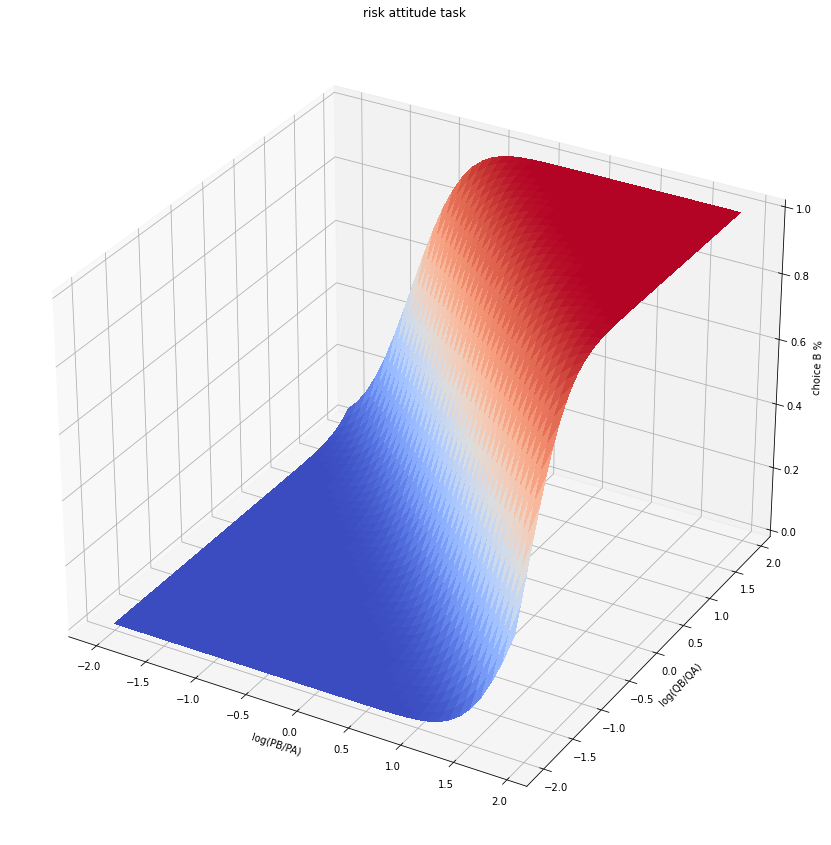

In [ ]:
# plot sigmoidal surface
X1_plot = np.arange(np.floor(np.min(X1)), np.ceil(np.max(X1)), 0.1)
X2_plot = np.arange(np.floor(np.min(X2)), np.ceil(np.max(X2)), 0.1)
X1_plot, X2_plot = np.meshgrid(X1_plot, X2_plot)
Y_plot = probit_model.predict(np.transpose([np.ones(np.shape(X1_plot)), X1_plot, X2_plot]))

# plot
fig = plt.figure(figsize =(20, 15))
ax = plt.axes(projection ='3d')
surf = ax.plot_surface(X1_plot, X2_plot, Y_plot, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('log(PB/PA)')
ax.set_ylabel('log(QB/QA)')
ax.set_zlabel('choice B %')
ax.set_title('risk attitude task');

In [ ]:
rho = np.exp(-betas[0]/betas[2])
print('relative value ρ is: ', np.array2string(rho))
eta = betas[2]
print('steepness η is: ', np.array2string(eta))
gamma = betas[1]/betas[2]
print('risk attitude 𝛾 is: ', np.array2string(gamma))


relative value ρ is:  1.37997226
steepness η is:  2.36429334
risk attitude 𝛾 is:  0.86824378
